## Introduction:

The rise in diabetes prevalence globally has emphasized the importance of predictive models in healthcare. These models, leveraging patient data and health metrics, play a crucial role in early detection and intervention strategies.

## Dataset Description:

The dataset used for developing a diabetes prediction system is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. It focuses on females of Pima Indian heritage, aged at least 21 years old. The dataset includes the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) - 1 indicates the presence of diabetes, 0 indicates no diabetes

This dataset serves as a valuable resource for training a predictive model aimed at determining the likelihood of diabetes based on various health parameters.

## Objective:

The objective is to employ machine learning techniques to construct a robust diabetes prediction system. By training a model on this dataset, the system aims to accurately predict the presence or absence of diabetes in individuals, thereby facilitating early identification and proactive management of this condition.


In [69]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Loaing data 
df= pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.shape

(768, 9)

In [72]:
# checking for missing value
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
#summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [75]:
# Age Group Analysis

# Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[-1, 30, 50, float('inf')],
                         labels=['Young Adults', 'Middle-Aged', 'Seniors'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6,148,72,35,0,33.6,0.627,50,1,Middle-Aged
1,1,85,66,29,0,26.6,0.351,31,0,Middle-Aged
2,8,183,64,0,0,23.3,0.672,32,1,Middle-Aged
3,1,89,66,23,94,28.1,0.167,21,0,Young Adults
4,0,137,40,35,168,43.1,2.288,33,1,Middle-Aged


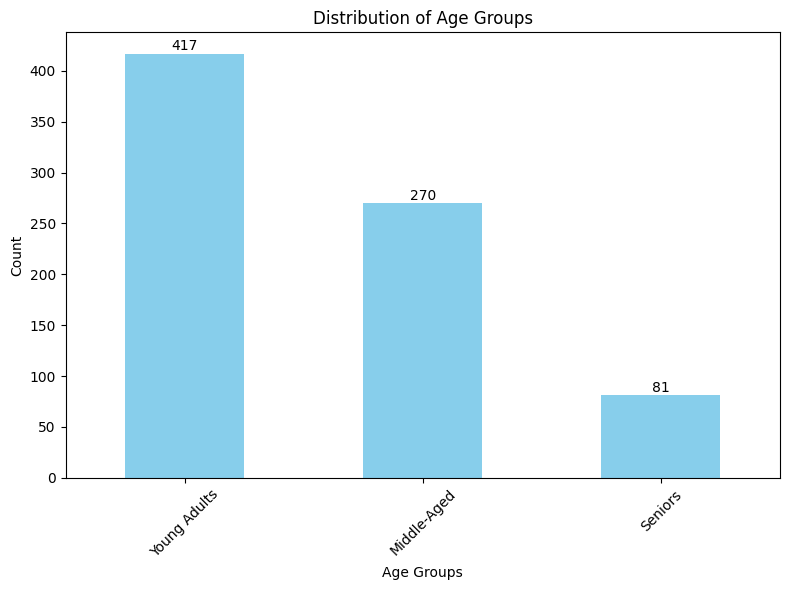

In [76]:

# Assuming df is your DataFrame with the 'Age_Group' column
age_group_counts = df['Age_Group'].value_counts()

plt.figure(figsize=(8, 6))
bars = age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Displaying the counts above each bar
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Age Group Analysis

Upon analyzing the dataset, it's evident that the distribution of individuals across different age groups is as follows:

- **Young Adults**: This group comprises the highest number of individuals in the dataset.
- **Middle-Aged**: Following young adults, the dataset includes a moderate number of individuals falling into this age group.
- **Seniors**: The dataset contains the fewest number of individuals in the senior citizens' age group.

This observation signifies a higher representation of young adults, followed by middle-aged individuals, with a relatively smaller proportion of senior citizens within the dataset.


C:\Users\ARJUN\AppData\Local\Temp\ipykernel_5632\2767610949.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 800x600 with 0 Axes>

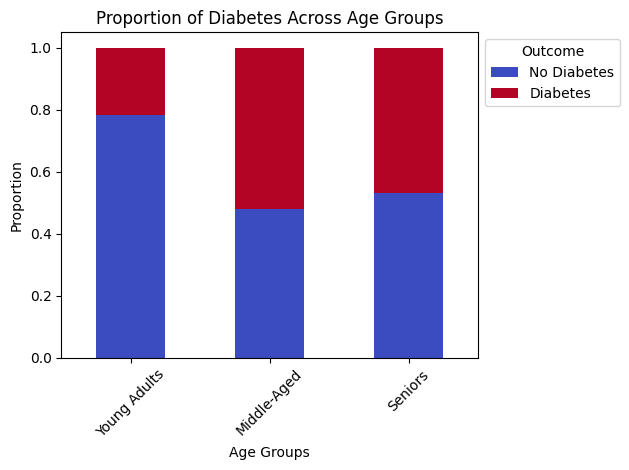

In [77]:

# Calculate proportions of diabetes within each age group
proportions = df.groupby(['Age_Group', 'Outcome']).size().unstack() 
proportions = proportions.div(proportions.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Proportion')
plt.legend(title='Outcome', loc='upper left', labels=['No Diabetes', 'Diabetes'], bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Young Adults**: Approximately 20% of individuals in this age group have diabetes.
- **Middle-Aged and Seniors**: Around half of the individuals in these age groups are affected by diabetes.

This observation suggests a significantly higher prevalence of diabetes among middle-aged and senior individuals compared to young adults. Approximately half of the middle-aged and senior populations have diabetes, whereas only about 20% of the young adults exhibit this condition based on the dataset analysis.


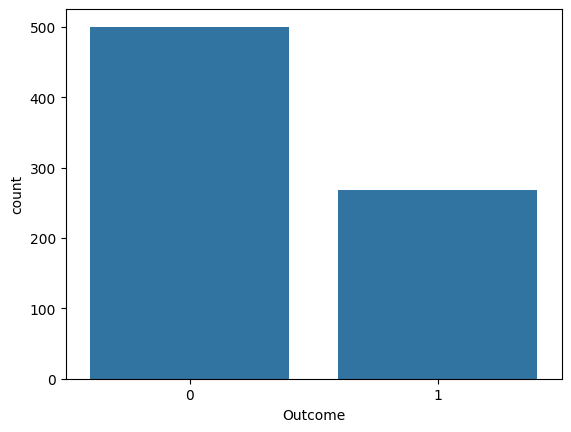

In [78]:
# Visualizing the distribution
sns.countplot(x="Outcome", data=df)
plt.show()

- Hence we understood our data is not balanced 

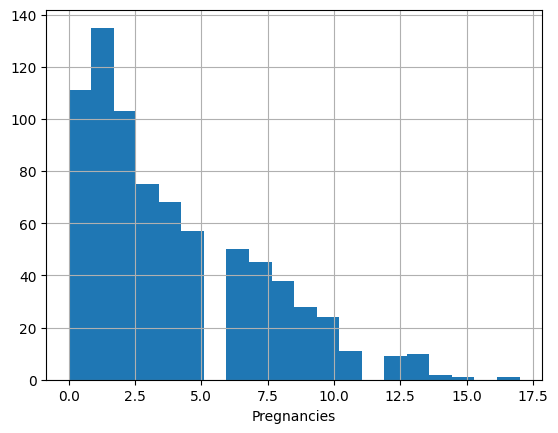

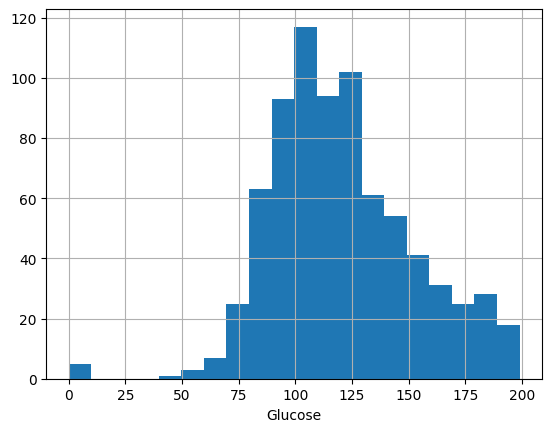

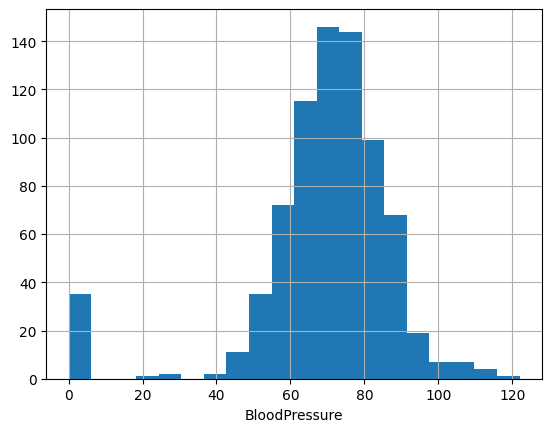

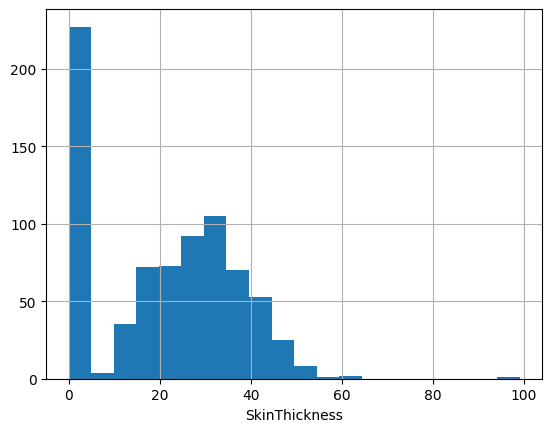

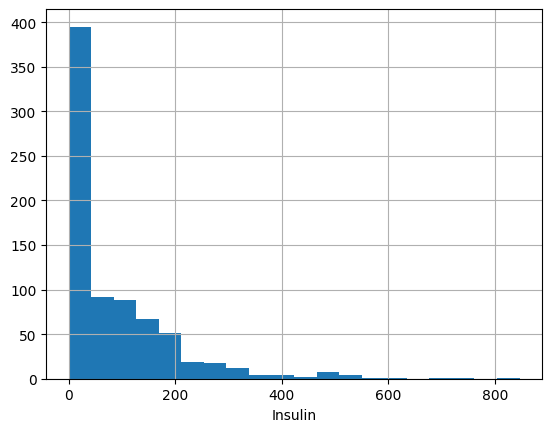

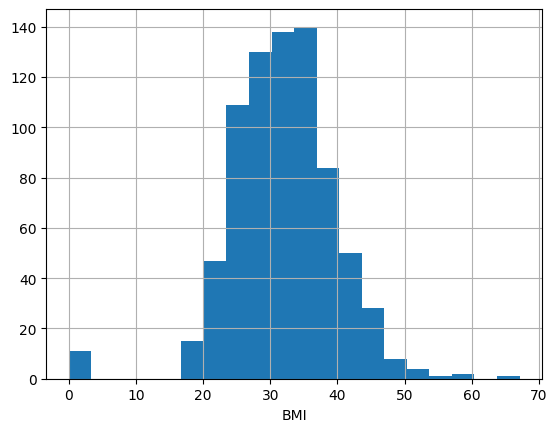

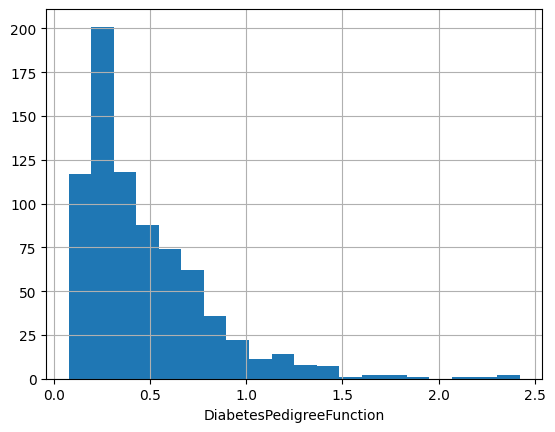

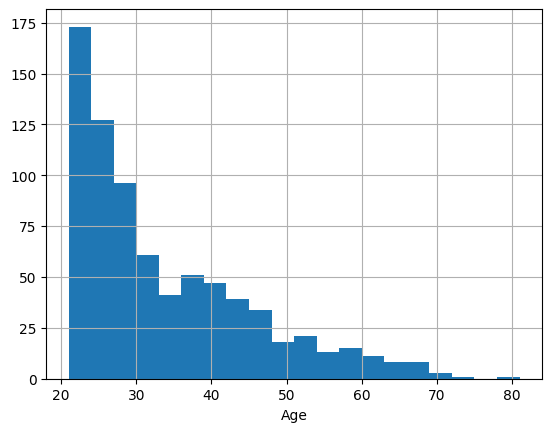

In [79]:

# distibution of columns
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

# Excluding the target variable
cols = [col for col in df.columns if 'Outcome' not in col and 'Age_Group' not in col]



for col in cols:
    plot_numerical_col(df, col)

In [80]:

correlation_matrix = df.drop(columns='Age_Group').corr()

correlation_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


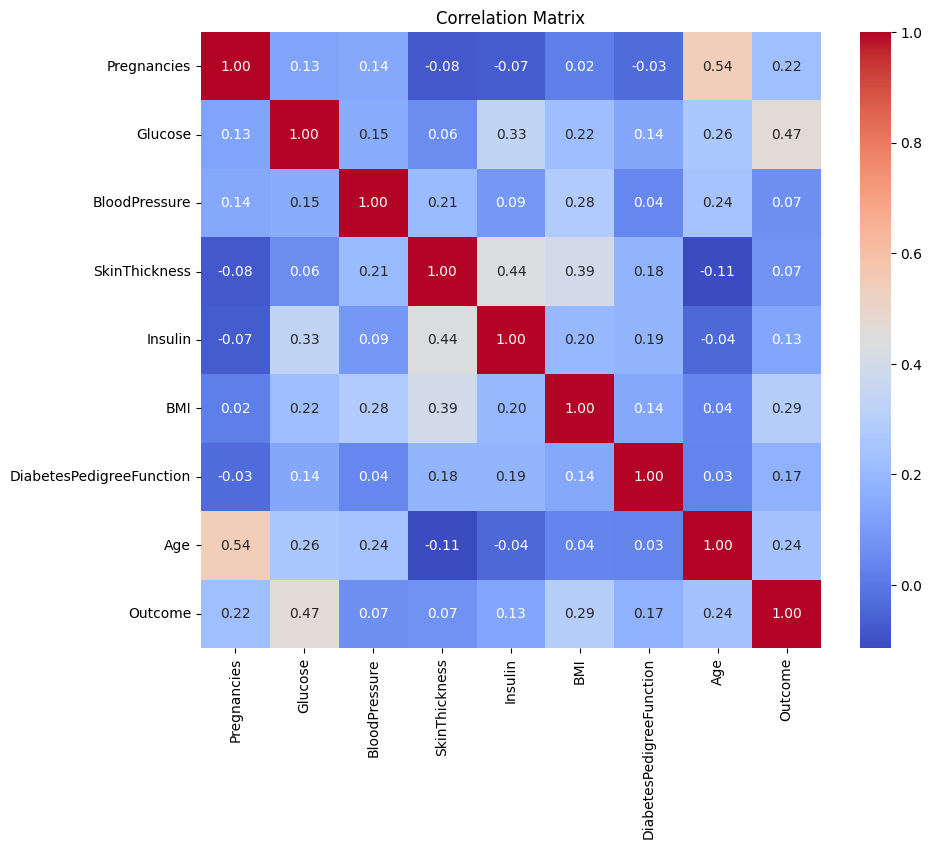

In [81]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Observations from Correlation Matrix:

- **Glucose and Outcome**: A relatively strong positive correlation (0.47) exists between 'Glucose' levels and the 'Outcome' (presence of diabetes), suggesting higher glucose levels are associated with a higher likelihood of diabetes.

- **Age and Outcome**: Moderate positive correlation (0.24) between 'Age' and 'Outcome' indicates age might influence the likelihood of diabetes.

- **BMI and Outcome**: Moderate positive correlation (0.29) between 'BMI' (Body Mass Index) and 'Outcome' suggests higher BMI values might relate to an increased likelihood of diabetes.

- **Pregnancies and Age**: A moderate positive correlation (0.54) between 'Pregnancies' and 'Age' suggests an increase in the number of pregnancies with age in this dataset.

- **SkinThickness and Insulin**: A relatively strong positive correlation (0.44) between 'SkinThickness' and 'Insulin' suggests a relationship between these two variables.


In [82]:
import plotly.express as px

# Exclude the 'Outcome' column from the box plot
numeric_columns = df.select_dtypes(include=['number']).columns.drop('Outcome')

fig = px.box(df, y=numeric_columns, title='Box Plot of Numeric Columns (Excluding "Outcome")')
fig.update_layout(xaxis_title='Numeric Columns', yaxis_title='Values')
fig.show()


In [83]:
# Droping age_group
df=df.drop(columns='Age_Group')

In [84]:
# Function to determine outlier thresholds based on given quantiles
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    # Calculate the first and third quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Calculate the interquartile range
    interquantile_range = quartile3 - quartile1
    
    # Define upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

# Function to check if outliers exist in a column
def check_outlier(dataframe, col_name):
    # Get the outlier thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    # Check if any values are outliers
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  # Outliers exist
    else:
        return False  # No outliers

# Function to replace outliers with the calculated thresholds
def replace_with_thresholds(dataframe, variable):
    # Get the outlier thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    
    # Replace outliers with the thresholds
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit




In [85]:
# Checking for outliers in the data
for col in cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [86]:
# Displaying the outlier values in the "Insulin" variable
replace_with_thresholds(df, "Insulin")

C:\Users\ARJUN\AppData\Local\Temp\ipykernel_5632\4044015675.py:33: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-439.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



 # Model Training and testing 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame and 'Outcome' is your target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Splitting the dataset into training and testing sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing StandardScaler
scaler = StandardScaler()

# Scaling the features (fit on training data and transform both training and testing data)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


## Logistic Regression

Best Parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



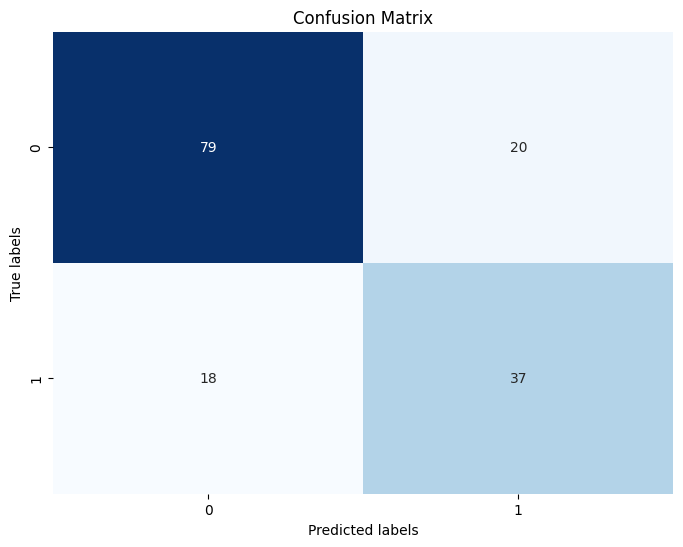

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Create logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': [ 'l2']  # Regularization penalty (L1 or L2)
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



## SVC Classifier

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy (SVC): 0.77

Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



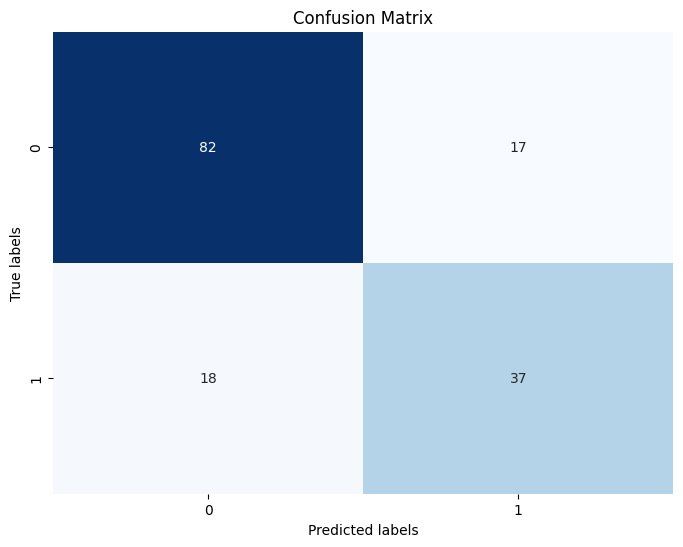

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 1, 10, 100],  # Various values for the regularization parameter C
    'gamma': [1, 0.1, 0.01, 0.001],  # Various values for the kernel coefficient gamma
    'kernel': ['rbf'],  # Kernel type
}

# Create the SVC model
svc = SVC(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred_svc = best_estimator.predict(X_test_scaled)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Best Parameters: {best_params}")
print(f"Accuracy (SVC): {accuracy_svc:.2f}")

# Display classification report for SVC
print("\nClassification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



## Descision Tree Classifer

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy (Decision Tree): 0.79

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



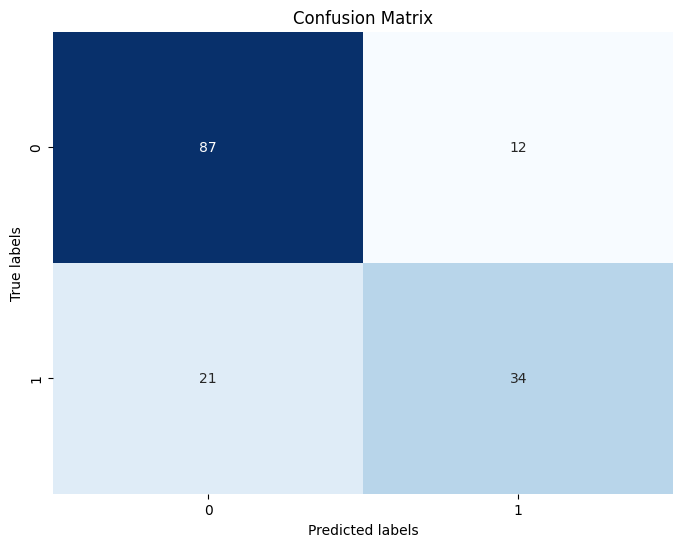

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid to search through
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

# Predict on the test set using the best estimator
y_pred_dt = best_estimator_dt.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Accuracy (Decision Tree): {accuracy_dt:.2f}")

# Display classification report for Decision Tree
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save the model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_estimator_dt, file)
